<h1><center>Solving Differential Equation with Shooting Method</center></h1>

---

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
%matplotlib notebook
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline

# $ y''(x) = {-2 \over x} y'(x) $
### $ y(1)=10, y(2)=0 $

In [3]:
e = 6
h0 = 0.1
def F(x,y):
    return np.matmul(x,y)

In [4]:
def X(x0,i,h=h0):
    return np.array([[0,1],[0,-2/(x0+i*h)]])

# $ y(x)=c.v(x)+u(x) $


$ Y' = X.Y $ 

$ Y' = \begin{pmatrix}
        y'\\
        y''
       \end{pmatrix}
       , X = \begin{pmatrix}
       0 & 1\\
       0 & -2 \over x
       \end{pmatrix}
       , Y = \begin{pmatrix}
        y\\
        y'
       \end{pmatrix}$

In [5]:
def RK4(x0,xn,y0,dy0,h=h0):
    m = int((xn-x0)/h)+1
    x = [np.array([[0,1],[0,-2/(x0+i*h)]]) for i in range(m)]
    y = [np.array([y0,dy0])]
    
    #H=np.array([[0,0],[0,]])
    for i in range(m-1):
        z = y[i].T
        k1 = h*F(x[i],z)
        k2 = h*F(X(x0,i+0.5,h), z+k1/2)
        k3 = h*F(X(x0,i+0.5,h), z+k2/2)
        k4 = h*F(x[i+1], z+k3)
        #print(k1)
        y1 = np.round(z+(k1 + 2*k2 + 2*k3 + k4)/6,e)
        y.append(y1.T)
    return y

R = RK4(x0=1,xn=2,y0=10,dy0=0)
u = np.array(R)[:,0]
R = RK4(x0=1,xn=2,y0=0,dy0=1)
v = np.array(R)[:,1]

In [6]:
import pandas as pd;
def data(x0,xn,yn,h=h0):
    c = (yn - u[-1])/v[-1]
    Y = c * v + u
    x = np.arange(x0,xn+h/2,h)
    
    df = pd.DataFrame({'x': x,
                       'u(x)': u,
                       'v(x)': v,
                       'y(x)': Y})
    return df


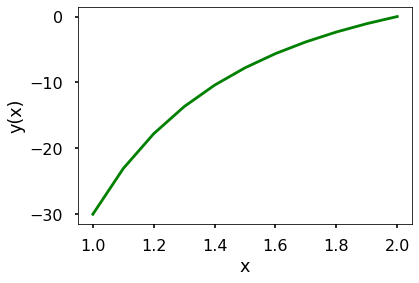

In [7]:
df = data(x0=1,xn=2,yn=0)
plt.plot(df['x'],df['y(x)'],color = 'green')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

In [8]:
df

,x,u(x),v(x),y(x)
0,1.0,10.0,1.000000,-29.999680
1,1.1,10.0,0.826448,-23.057656
2,1.2,10.0,0.694447,-17.777658
3,1.3,10.0,0.591719,-13.668571
4,1.4,10.0,0.510207,-10.408117
5,1.5,10.0,0.444447,-7.777738
6,1.6,10.0,0.390627,-5.624955
7,1.7,10.0,0.346023,-3.840809
8,1.8,10.0,0.308644,-2.345661
9,1.9,10.0,0.277010,-1.080311


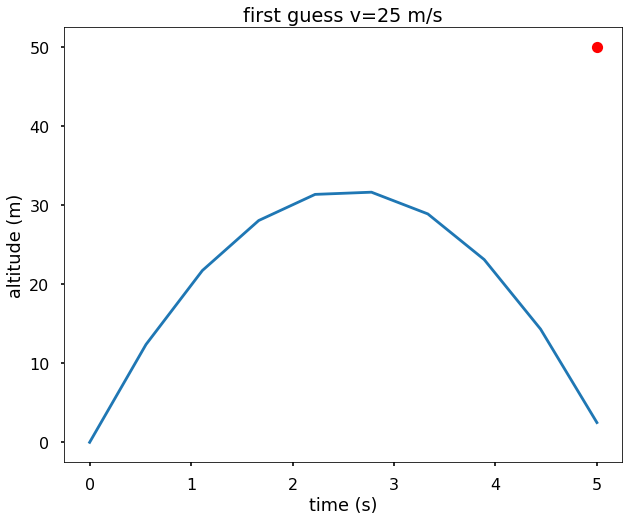

In [9]:
F = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

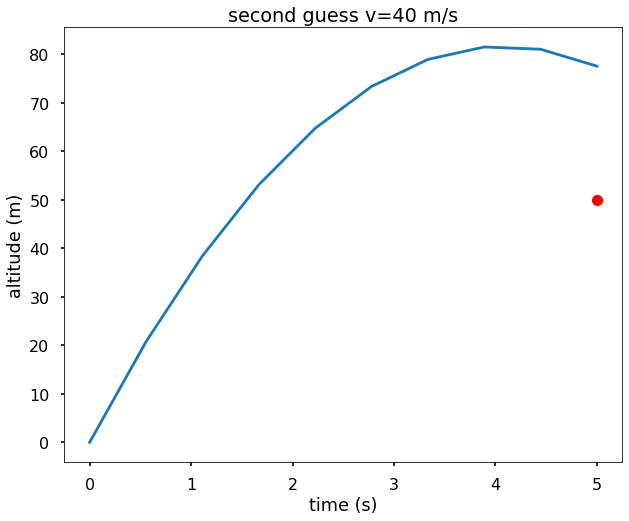

In [10]:
v0 = 40
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')
plt.show()


In [11]:
from scipy.optimize import fsolve

def objective(v0):
    sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

34.499999999999986


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


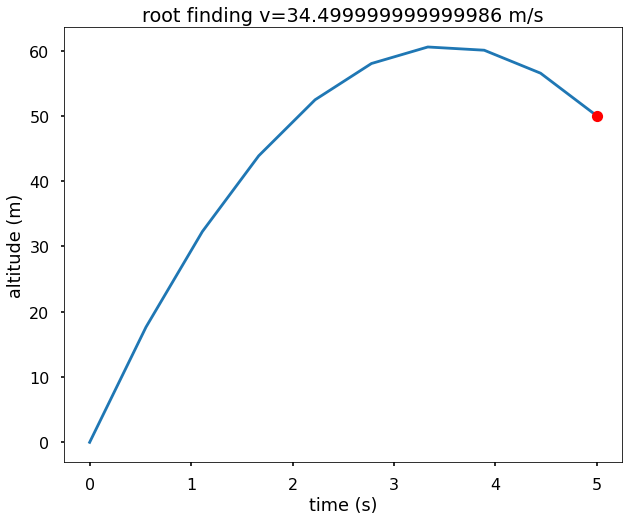

In [12]:
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={v0} m/s')
plt.show()
